<a href="https://colab.research.google.com/github/gonzacastro/SOA-TP2-Android/blob/main/EJ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introducción**

El objetivo de este ejercicio es realizar un pixeleado de imagenes total y por color, de esta manera mediante la utilizacion de una biblioteca (PIL) procesaremos una alta cantidad de datos de forma eficiente y rapida aprovechando el entorno de GPU provisto.

# **2. Armado del Ambiente**

In [ ]:
imgURL = "https://pbs.twimg.com/media/ExHxTlFWEAEmhTd.jpg"#@param {type:"string"}
Colores = 'Azul' #@param ["Blanco", "Negro","Gris", "Rojo","Verde","Azul","Rosa","Violeta","Naranja","Amarillo"]
NivelPixelado = 50#@param {type:"integer"}
!wget {imgURL} -O imagen.png
!pip install pycuda


--2021-07-12 01:23:49--  https://pbs.twimg.com/media/ExHxTlFWEAEmhTd.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 72.21.91.70, 2606:2800:220:13d:2176:94a:948:148e
Connecting to pbs.twimg.com (pbs.twimg.com)|72.21.91.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45703 (45K) [image/jpeg]
Saving to: ‘imagen.png’

imagen.png          100%[===================>]  44.63K  --.-KB/s    in 0.007s  

2021-07-12 01:23:49 (6.28 MB/s) - ‘imagen.png’ saved [45703/45703]

  Using cached https://files.pythonhosted.org/packages/5a/56/4682a5118a234d15aa1c8768a528aac4858c7b04d2674e18d586d3dfda04/pycuda-2021.1.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/52/26/c7ab098ceb4e4e3f0e66e21257a286bb455ea22af7afefbd704d9ccf324c/pytools-2021.2.7.tar.gz
  Using cached https://files.pythonhosted.org/packages/f3/54/dbc07fbb20865d3b78fdb7cf7fa713

# **3. Desarrollo**

El desarrollo del ejercicio se realizo utilizando metodos de la biblioteca PIL, por razones mencionadas anteriormente. Lo que se hizo fue achicar la imagen(downscaling) y luego al aumentarla(upscaling) se hace un promedio (con el metodo de vecinos) de los colores de lo pixeles y se utiliza el color que predomina.
Luego, para el pixelado por color:
Se creo una paleta de colores con sus rangos RGB
Se duplico la imagen, donde una sera pixelada por completa y a la otra no se le realizaran cambios
Se itera los pixeles de la imagen que no sufre cambios y si cumple con el rango del color seleccionado, se reemplaza el grupo de pixeles de ese color con el otro grupo "pixelado"

 

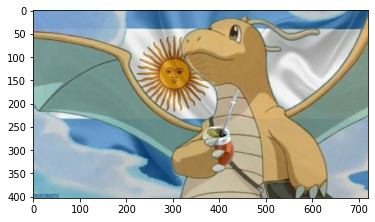

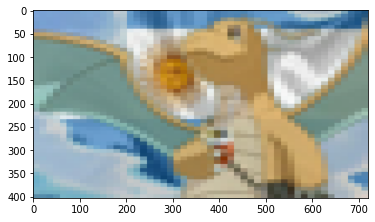

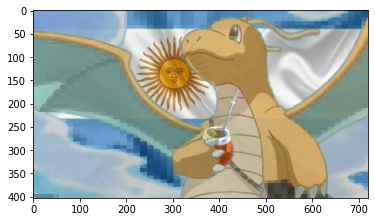

In [ ]:
try:
  %matplotlib inline
  import matplotlib.pyplot as plt
  import sys
  import numpy
  from PIL import Image 
  import pycuda.driver as cuda
  import pycuda.autoinit
  import functools
  from functools import reduce
  from pycuda.compiler import SourceModule
  rango1 = [0,0,0]
  rango2 = [255,255,255] 
  if(Colores == 'Gris'):
    rango1 = [120,120,120]
    rango2 = [190,190,190]
  if(Colores == 'Negro'):
    rango1 = [0,0,0]
    rango2 = [50,50,50]
  if(Colores == 'Blanco'):
    rango1 = [200,200,200]
    rango2 = [255,255,255]
  if(Colores == 'Rojo'):
    rango1 = [0,0,0]
    rango2 = [255,170,120]
  if(Colores == 'Azul'):
    rango1 = [0,0,0]
    rango2 = [125,175,255]
  if(Colores == 'Verde'):
    rango1 = [0,0,0]
    rango2 = [175,255,155]
  if(Colores == 'Violeta'):
    rango1 =[20,0,80]
    rango2 = [190,170,215]
  if(Colores == 'Naranja'):
    rango1 = [160,80,0]
    rango2 = [255,245,225] 
  if(Colores == 'Amarillo'):
    rango1 = [150,125,0]
    rango2 = [255,255,90]
  if(Colores == 'Gris'):
    rango1 = [200,0,85]
    rango2 = [255,235,250]

  img_nombre = 'imagen.png'
  image = Image.open( img_nombre )
  plt.figure()
  imgplot=plt.imshow(image)
  imgSmall = image.resize((NivelPixelado,NivelPixelado))
  result = imgSmall.resize(image.size,0)
  pixels = image.load()
  pixels2 = result.load()
  for i in range(image.size[0]):
    for j in range(image.size[1]):
      r,g,b = pixels[i,j]
      if(r >=rango1[0] and g >=rango1[1] and b >=rango1[2] and r <= rango2[0] and g <= rango2[1] and b <= rango2[2]):
        pixels[i,j] = pixels2[i,j]
  plt.figure()
  imgplot=plt.imshow(result)
  plt.figure()
  imgplot=plt.imshow(image)
except Exception as e:
  print("Error", e )
  sys.exit()

# **Concluciones**

Como conclucion podemos decir que la utilizacion de la biblioteca permite el procesamiento de una gran cantidad de datos en poco tiempo, sin la necesidad de ejecutar codigo kernel de forma manual.

# **Bibliografia**

https://pillow.readthedocs.io/en/stable/

https://pypi.org/project/Pillow/

